In [18]:
import pylab
import csv
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
with open('complete.csv','rb') as csvfile:
    reader = csv.reader(csvfile)
    i = 0
    x = [[],[],[],[],[]]
    for row in reader:
        if(i != 0):
           # print row[] + ", " + row[2]
            if(float(row[6]) != 0):
                x[2].append(float(row[6]))
                x[0].append(float(row[8]))
                x[1].append(float(row[11]))
                x[3].append(float(row[9]))
                x[4].append(row[12])
        else:
            i = i +1

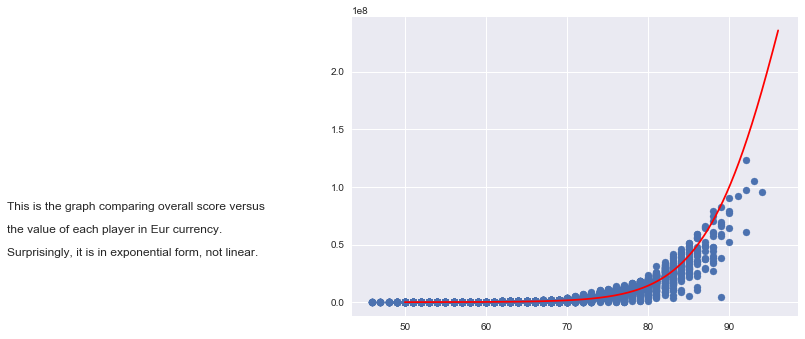

In [19]:

def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c
    popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1))

xp = np.linspace(50, 96, 1000)
p4 = np.poly1d(np.polyfit(x[0], np.log(x[2]), 3))
pylab.scatter(x[0], x[2])
pylab.plot(xp, np.exp(p4(xp)), c='r')
plt.text(1,80000000, 'This is the graph comparing overall score versus')
plt.text(1,60000000, 'the value of each player in Eur currency.')
plt.text(1,40000000, 'Surprisingly, it is in exponential form, not linear.')
plt.show()

In [20]:
 with open('complete.csv','rb') as csvfile:
    reader = csv.reader(csvfile)
    i = 0
    x = [[],[],[],[],[]]
    for row in reader:
        if(i != 0):
            x[2].append(float(row[6]))
            x[0].append(float(row[8]))
            x[1].append(float(row[11]))
            x[3].append(float(row[9]))
            x[4].append(row[12])
        else:
            i = i +1

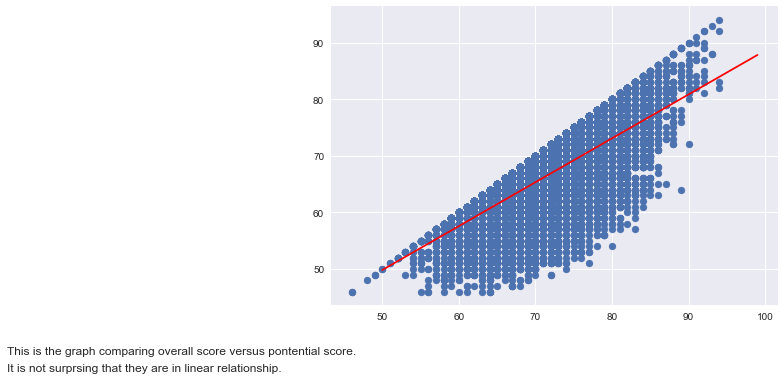

In [21]:
overAndPo = np.poly1d(np.polyfit(x[3], x[0], 1))

xp = np.linspace(50, 99, 1000)
plt.scatter(x[3], x[0])
plt.plot(xp, overAndPo(xp),c = 'r')
plt.text(1,35, 'This is the graph comparing overall score versus pontential score.')
plt.text(1,32, 'It is not surprsing that they are in linear relationship.')
plt.show()

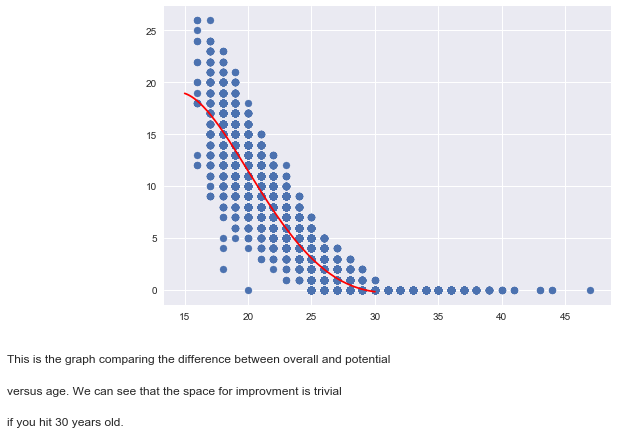

In [22]:
gap = []
for i in range(0, len(x[0])):
    gap.append(x[3][i] - x[0][i])
gapMatchAge = np.poly1d(np.polyfit(x[1], gap, 5))
xp = np.linspace(15, 30, 1000)
plt.scatter(x[1], gap)
plt.plot(xp, gapMatchAge(xp),c = 'r')
plt.text(1,-7, 'This is the graph comparing the difference between overall and potential')
plt.text(1,-10, 'versus age. We can see that the space for improvment is trivial')
plt.text(1,-13, 'if you hit 30 years old.')
plt.show()

17994


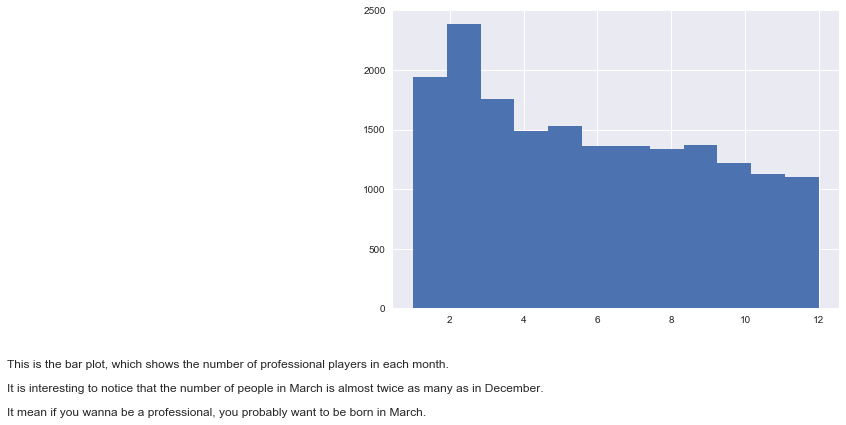

In [23]:

birth = [[],[]]
month = [1,2,3,4,5,6,7,8,9,10,11,12]
birthCount = [0,0,0,0,0,0,0,0,0,0,0,0]
for date in x[4]:
   birth[0].append(int((date[5]+date[6])))
for month in birth[0]:
    birthCount[month-1] = birthCount[month-1]+ 1
print len(x[4])
plt.hist(birth[0],12)
plt.text(-10,-500, 'This is the bar plot, which shows the number of professional players in each month.')
plt.text(-10,-700, 'It is interesting to notice that the number of people in March is almost twice as many as in December.')
plt.text(-10,-900, 'It mean if you wanna be a professional, you probably want to be born in March.')
plt.show()

In [25]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df1 = pd.read_csv('complete.csv')
dateData = {'birthMonth' : birth[0]}
df2 = pd.DataFrame(data = dateData)
x = df1[["age","height_cm","weight_kg"]]
e = pd.Series(birth[0])
x = x.assign(birth_date = e.values)


y = df1["overall"]
#x[["age","height_cm","weight_kg","birth_date"]] = scale.fit_transform(x[["age","height_cm","weight_kg","birth_date"]].as_matrix())
x1 = sm.add_constant(x)
est = sm.OLS(y,x1).fit()
est.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     1231.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        00:18:18   Log-Likelihood:                -58233.
No. Observations:               17994   AIC:                         1.165e+05
Df Residuals:                   17989   BIC:                         1.165e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1946      1.479     35.968      0.000      50.296      56.093
age            0.6732      0.010     65.292      0.000       0.653       0.693
height_cm     -0.0525      0.011     -4.859      0.000      -0.074      -0.031
weight_kg      0.0765      0.011      7.241      0.000       0.056       0.097
birth_date    -0.0174      0.013     -1.310      0.190      -0.043       0.009
==============================================================================
Omnibus:                      230.817   Durbin-Watson:                   0.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.339
Skew:                           0.241   Prob(JB):                     2.17e-56
Kurtosis:                       3.332   Cond. No.                     6.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""